## Fama-French Three-Factor Model

$$r_i - r_f = \alpha_i + \beta_{i}(r_M - r_f) + s_iSMB+ h_iHML + \epsilon_{i}$$

In [97]:
import yfinance as yf
import pandas_datareader.data as reader

import pandas as pd
import datetime as dt
import statsmodels.api as sm

## Getting Data

In [98]:
end = dt.date(2020, 1, 1)
start = dt.date(end.year - 5, end.month, end.day)
funds = ['FDGRX']

In [99]:
df = yf.download(funds, start=start, end=end)
df.columns = df.columns.droplevel('Ticker')
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,7.078948,7.078948,7.078948,7.078948,0
2015-01-05,6.976876,6.976876,6.976876,6.976876,0
2015-01-06,6.891996,6.891996,6.891996,6.891996,0
2015-01-07,7.003737,7.003737,7.003737,7.003737,0
2015-01-08,7.128909,7.128909,7.128909,7.128909,0
...,...,...,...,...,...
2019-12-24,14.765066,14.765066,14.765066,14.765066,0
2019-12-26,14.871243,14.871243,14.871243,14.871243,0
2019-12-27,14.816826,14.816826,14.816826,14.816826,0


In [100]:
df['returns_daily'] = df['Close'].pct_change()
df

Price,Close,High,Low,Open,Volume,returns_daily
Date,,,,,,
2015-01-02,7.078948,7.078948,7.078948,7.078948,0,NaN
2015-01-05,6.976876,6.976876,6.976876,6.976876,0,-0.014419
2015-01-06,6.891996,6.891996,6.891996,6.891996,0,-0.012166
2015-01-07,7.003737,7.003737,7.003737,7.003737,0,0.016213
2015-01-08,7.128909,7.128909,7.128909,7.128909,0,0.017872
...,...,...,...,...,...,...
2019-12-24,14.765066,14.765066,14.765066,14.765066,0,0.002252
2019-12-26,14.871243,14.871243,14.871243,14.871243,0,0.007191
2019-12-27,14.816826,14.816826,14.816826,14.816826,0,-0.003659


In [101]:
returns_monthly = df['returns_daily'].resample('ME').agg(lambda x: (x+1).prod() - 1)
returns_monthly.head()

Date
2015-01-31   -0.004064
2015-02-28    0.068234
2015-03-31   -0.013433
2015-04-30    0.001521
2015-05-31    0.025020
Freq: ME, Name: returns_daily, dtype: float64

## Creating Factors

In [102]:
factors = reader.DataReader('F-F_Research_Data_Factors','famafrench',start,end)

/var/folders/v9/tn6d82cx4gd1k62yqr97qy_40000gn/T/ipykernel_93021/2914450222.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader('F-F_Research_Data_Factors','famafrench',start,end)
/var/folders/v9/tn6d82cx4gd1k62yqr97qy_40000gn/T/ipykernel_93021/2914450222.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader('F-F_Research_Data_Factors','famafrench',start,end)


In [103]:
factors

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 2015-01   -3.10 -0.59 -3.45  0.00
 2015-02    6.13  0.61 -1.79  0.00
 2015-03   -1.11  3.05 -0.38  0.00
 2015-04    0.59 -2.99  1.80  0.00
 2015-05    1.37  0.95 -1.11  0.00
 ...         ...   ...   ...   ...
 2019-09    1.41 -0.97  6.76  0.18
 2019-10    2.07  0.27 -1.92  0.15
 2019-11    3.87  0.72 -2.00  0.12
 2019-12    2.77  0.76  1.73  0.14
 2020-01   -0.11 -3.10 -6.22  0.13
 
 [61 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 2015    0.20  -3.89  -9.53  0.02
 2016   13.36   6.54  22.81  0.20
 2017   21.50  -5.28 -13.37  0.80
 2018   -6.82  -3.23  -9.62  1.81
 2019   28.35  -6.21 -10.36  2.14
 2020   23.59  13.45 -47.00  0.44,
 'DESCR': 'F-F Research Data Factors\n-------------------------\n\nThis file was created using the 202504 CRSP database. The 1-month TBill rate data until 202405 are from Ibbotson Associates. Starting from 202406, the 1-month TBill rate is 

In [104]:
factors_monthly = factors[0]
factors_monthly.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2015-01,-3.10,-0.59,-3.45,0.0
2015-02,6.13,0.61,-1.79,0.0
2015-03,-1.11,3.05,-0.38,0.0
2015-04,0.59,-2.99,1.80,0.0
2015-05,1.37,0.95,-1.11,0.0


In [105]:
factors_monthly = factors_monthly[1:]
factors_monthly.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2015-02,6.13,0.61,-1.79,0.0
2015-03,-1.11,3.05,-0.38,0.0
2015-04,0.59,-2.99,1.80,0.0
2015-05,1.37,0.95,-1.11,0.0
2015-06,-1.52,2.94,-0.82,0.0


In [106]:
factors_monthly.shape, returns_monthly.shape

((60, 4), (60,))

In [107]:
returns_monthly.index = factors_monthly.index

In [108]:
returns_monthly.head()

Date
2015-02   -0.004064
2015-03    0.068234
2015-04   -0.013433
2015-05    0.001521
2015-06    0.025020
Freq: M, Name: returns_daily, dtype: float64

In [109]:
merged_df = pd.merge(returns_monthly, factors_monthly, on='Date')
merged_df.head()

,returns_daily,Mkt-RF,SMB,HML,RF
Date,,,,,
2015-02,-0.004064,6.13,0.61,-1.79,0.0
2015-03,0.068234,-1.11,3.05,-0.38,0.0
2015-04,-0.013433,0.59,-2.99,1.80,0.0
2015-05,0.001521,1.37,0.95,-1.11,0.0
2015-06,0.025020,-1.52,2.94,-0.82,0.0


In [110]:
merged_df = merged_df.rename(columns={'returns_daily':'returns_monthly'})
merged_df.head()

,returns_monthly,Mkt-RF,SMB,HML,RF
Date,,,,,
2015-02,-0.004064,6.13,0.61,-1.79,0.0
2015-03,0.068234,-1.11,3.05,-0.38,0.0
2015-04,-0.013433,0.59,-2.99,1.80,0.0
2015-05,0.001521,1.37,0.95,-1.11,0.0
2015-06,0.025020,-1.52,2.94,-0.82,0.0


In [111]:
merged_df[[
    'Mkt-RF',
    'SMB',
    'HML',
    'RF'
]] = merged_df[['Mkt-RF','SMB','HML','RF']] / 100
merged_df.head()

,returns_monthly,Mkt-RF,SMB,HML,RF
Date,,,,,
2015-02,-0.004064,0.0613,0.0061,-0.0179,0.0
2015-03,0.068234,-0.0111,0.0305,-0.0038,0.0
2015-04,-0.013433,0.0059,-0.0299,0.0180,0.0
2015-05,0.001521,0.0137,0.0095,-0.0111,0.0
2015-06,0.025020,-0.0152,0.0294,-0.0082,0.0


$$r_i - r_f = \alpha_i + \beta_{i}(r_M - r_f) + s_iSMB+ h_iHML + \epsilon_{i}$$

In [112]:
merged_df['returns_monthly - rf'] = merged_df['returns_monthly'] - merged_df['RF']
merged_df.head()

,returns_monthly,Mkt-RF,SMB,HML,RF,returns_monthly - rf
Date,,,,,,
2015-02,-0.004064,0.0613,0.0061,-0.0179,0.0,-0.004064
2015-03,0.068234,-0.0111,0.0305,-0.0038,0.0,0.068234
2015-04,-0.013433,0.0059,-0.0299,0.0180,0.0,-0.013433
2015-05,0.001521,0.0137,0.0095,-0.0111,0.0,0.001521
2015-06,0.025020,-0.0152,0.0294,-0.0082,0.0,0.025020


In [113]:
y = merged_df['returns_monthly - rf']
X = merged_df[['Mkt-RF', 'SMB', 'HML']]

## Fitting Linear Regression Model Based on Factors

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [115]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [116]:
ln = LinearRegression()
ln.fit(X_train, y_train)
mse = mean_squared_error(y_test, ln.predict(X_test))
print(f"mse: {mse:.6f}")

mse: 0.004535


In [117]:
X_train.head()

,Mkt-RF,SMB,HML
Date,,,
2017-09,0.0249,0.0445,0.0315
2015-05,0.0137,0.0095,-0.0111
2019-06,0.0692,0.0025,-0.0067
2016-07,0.0394,0.0245,-0.0124
2015-10,0.0775,-0.0190,-0.0047


In [119]:
ln.coef_, ln.intercept_

(array([-0.38121581,  0.12839539, -0.19728054]),
 np.float64(0.017599723801923043))

In [121]:
ln2 = sm.OLS(y, sm.add_constant(X))
results = ln2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     returns_monthly - rf   R-squared:                       0.057
Model:                              OLS   Adj. R-squared:                  0.006
Method:                   Least Squares   F-statistic:                     1.122
Date:                  Mon, 09 Jun 2025   Prob (F-statistic):              0.348
Time:                          16:49:51   Log-Likelihood:                 102.11
No. Observations:                    60   AIC:                            -196.2
Df Residuals:                        56   BIC:                            -187.9
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0147      0.006      2.360      0.022       0.002       0.027
Mkt-RF        -0.2768      0.174     -1.587      0.118      -0.626       0.073
SMB            0.2204      0.260      0.847      0.401      -0.301       0.741
HML           -0.2126      0.224     -0.947      0.347      -0.662       0.237
==============================================================================
Omnibus:                        7.136   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                6.336
Skew:                          -0.662   Prob(JB):                       0.0421
Kurtosis:                       3.883   Cond. No.                         46.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
import backtrader as bt

# visualization
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display

In [152]:
end = dt.date(2025, 1, 1)
start = dt.date(end.year - 5, end.month, end.day)
funds = ['FDGRX']

In [153]:
backtest_df = yf.download(funds, start=start, end=end)
backtest_df.columns = backtest_df.columns.droplevel('Ticker')
backtest_df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,14.906374,14.906374,14.906374,14.906374,0
2020-01-03,14.803048,14.803048,14.803048,14.803048,0
2020-01-06,14.947706,14.947706,14.947706,14.947706,0
2020-01-07,14.961481,14.961481,14.961481,14.961481,0
2020-01-08,15.071694,15.071694,15.071694,15.071694,0
...,...,...,...,...,...
2024-12-24,41.815002,41.815002,41.815002,41.815002,0
2024-12-26,41.779999,41.779999,41.779999,41.779999,0
2024-12-27,41.139999,41.139999,41.139999,41.139999,0


In [154]:
factors = reader.DataReader('F-F_Research_Data_Factors','famafrench',start,end)[0]
factors.head()

/var/folders/v9/tn6d82cx4gd1k62yqr97qy_40000gn/T/ipykernel_93021/1464169691.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader('F-F_Research_Data_Factors','famafrench',start,end)[0]
/var/folders/v9/tn6d82cx4gd1k62yqr97qy_40000gn/T/ipykernel_93021/1464169691.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader('F-F_Research_Data_Factors','famafrench',start,end)[0]


,Mkt-RF,SMB,HML,RF
Date,,,,
2020-01,-0.11,-3.10,-6.22,0.13
2020-02,-8.15,1.08,-3.82,0.12
2020-03,-13.37,-4.70,-13.83,0.12
2020-04,13.60,2.50,-1.34,0.00
2020-05,5.57,2.40,-5.00,0.01


In [155]:
factors.index = factors.index.to_timestamp()

## Creating Strategy and Running

In [ ]:
class FamaFrench(bt.Strategy):
    # simply prints
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    # define parameters
    def __init__(self):
        # close price
        self.dataclose = self.datas[0].close

        # params
        self.datamkt = self.datas[1].Mkt_RF
        self.dataSMB = self.datas[1].SMB
        self.dataHML = self.datas[1].HML
        self.dataRF = self.datas[1].RF
        
        # track pending orders
        self.order = None

        # last month
        self.last_month = None

        # model
        self.coeffs = ln.coef_
        self.intercept = ln.intercept_

    
    # tracking when the order is executed
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    # logic
    def next(self):
        if self.order:
            return
        
        dt = self.data.datetime.date(0)
        month = dt.month

        if month == self.last_month:
            return
        
        # otherwise, in new month
        # pull that month's factor values
        cur_mkt = self.datamkt[0]
        cur_SMB = self.dataSMB[0]
        cur_HML = self.dataHML[0]
        cur_RF = self.dataRF[0]

        # compute predicted excess return
        pred_excess = (self.intercept + 
                        cur_mkt * self.coeffs[0] +
                        cur_SMB * self.coeffs[1] +
                        cur_HML * self.coeffs[2])
        print(f"pred excess: {pred_excess}")
        # signal: go long if expected to beat r_i - r_f, else exit
        if pred_excess > 0 and not self.position:
            self.order = self.buy()
        elif pred_excess <= 0 and self.position:
            self.order = self.close()

        self.last_month = month

Starting Portfolio Value: 1000.00
pred excess: 0.8885926966659645
2020-01-03, BUY EXECUTED, 14.80
pred excess: 4.016787236639144
pred excess: 7.239386578868583
pred excess: -4.58159086504547
2020-04-02, SELL EXECUTED, 12.55
pred excess: -0.811220696954453
pred excess: -0.14546454331809217
pred excess: -2.22588413947223
pred excess: -2.3191293913454403
pred excess: 1.9475592464274532
2020-09-02, BUY EXECUTED, 22.73
pred excess: 0.5412528968619753
pred excess: -4.390375176909673
2020-11-03, SELL EXECUTED, 21.35
pred excess: -0.7707644473527684
pred excess: 0.33110790506853216
2021-01-05, BUY EXECUTED, 24.63
pred excess: -2.2020584476388003
2021-02-02, SELL EXECUTED, 26.13
pred excess: -2.9342426405528155
pred excess: -2.0784625262954584
pred excess: -1.515244695757976
pred excess: 0.7386150962663518
2021-06-02, BUY EXECUTED, 26.64
pred excess: -0.6435009784632938
2021-07-02, SELL EXECUTED, 28.73
pred excess: -1.0975630954328557
pred excess: 0.7781939549676389
2021-09-02, BUY EXECUTED, 30

<IPython.core.display.Javascript object>

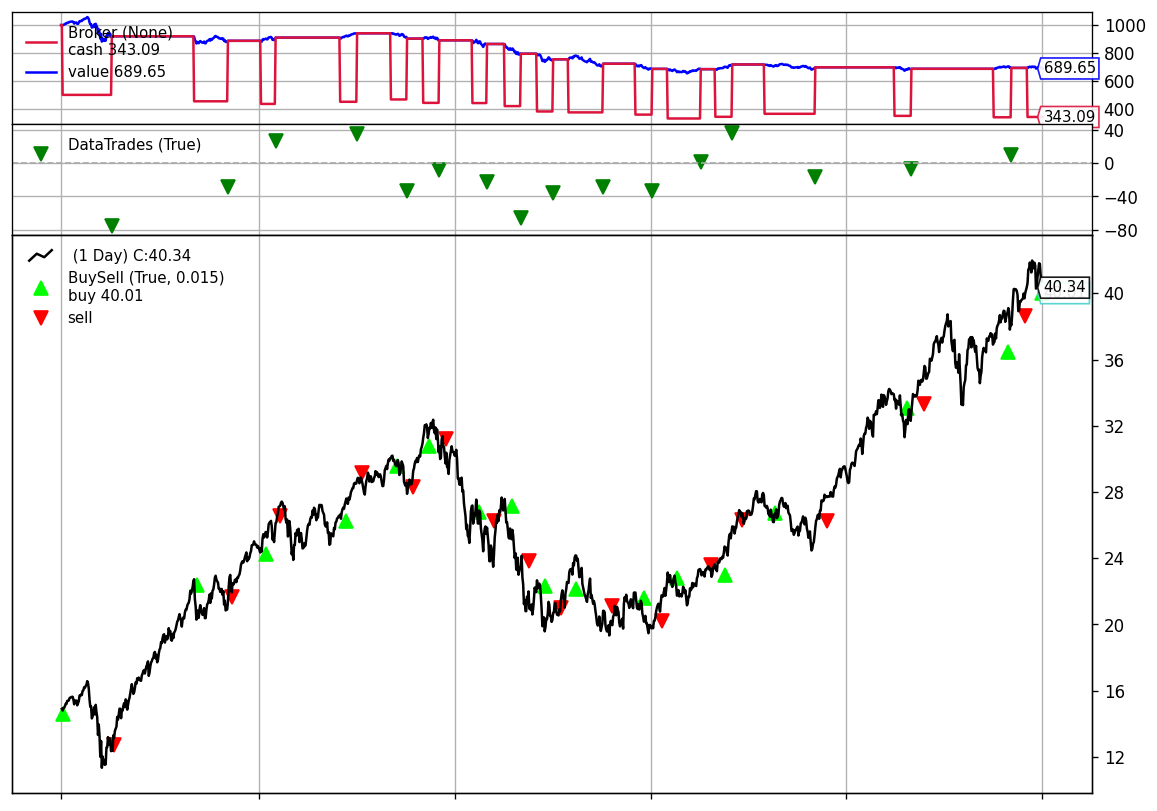

In [176]:
# Create a cerebro entity
cerebro = bt.Cerebro()

# Add a strategy
cerebro.addstrategy(FamaFrench)

# Create a Data Feed
FDGRX_data = bt.feeds.PandasData(dataname=backtest_df)

# Add the Data Feed to Cerebro
cerebro.adddata(FDGRX_data)


class FFData(bt.feeds.PandasData):
    # Declare new lines (valid Python identifiers)
    lines = ('Mkt_RF', 'SMB', 'HML', 'RF')
    params = (
        ('datetime', None),       # we’ll use the DataFrame’s index
        ('open', -1),             # no OHLC fields
        ('high', -1),
        ('low', -1),
        ('close', -1),
        ('volume', -1),
        ('openinterest', -1),
        # Map our new lines to the DataFrame’s columns
        ('Mkt_RF', 'Mkt-RF'),
        ('SMB',    'SMB'),
        ('HML',    'HML'),
        ('RF',     'RF'),
    )
factors_feed = FFData(dataname=factors, plot=False)
cerebro.adddata(factors_feed)

# Set our desired cash start
cerebro.broker.setcash(1000)

# commissions
cerebro.broker.setcommission(commission=0.005)

# size of trades
cerebro.addsizer(bt.sizers.PercentSizer, percents=50)

# Print out the starting conditions
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run over everything
cerebro.run()

# Print out the final result
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Plot the result
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.dpi'] = 120
figs = cerebro.plot()
for figlist in figs:
    for f in figlist:
        display(f)